# The Plan

0. Make sure you have all tools installed. mafft, trimal, iqtree at the very least. 
   - use `conda env create -f ./conda_environment.yaml` to create this environment and re-open jupyter inside the environment if you haven't already.
1. Get a set of sequences to build a tree of.
   - for example from the 1kP project, a paper you found, or from blast.
   - Subset sequences if there are too many.
   - Do you have an outgroup to root your tree on? (unless you won't root your tree)
   - Do you have trusted or verified sequences to make sense of the different clades you may get in your tree?
2. Align these to each other.
   - using mafft or another aligner like clustalw, tcoffee or prank.
3. Trim the alignment, removing gaps.
   - with trimAL, optimise trimming to both make your tree building faster and more reliable.
4. Build a fast phylogentic tree.
   - with `fasttree`, or with `iqtree --fast`
5. Build a thorough phylogenetic tree.
   - We combine substitution model fitting and tree building in IQtree.
6. Visualise and share your tree
   - [iToL](http://www.iqtree.org/doc/Frequently-Asked-Questions#how-do-i-interpret-ultrafast-bootstrap-ufboot-support-values)
   
## Annotate and log

A jupy notebook like this, is your labjournal for doing research on the computer. In here you keep a record of 
 - what files you use
 - how you made new files
 - where you stored these
 - etcetera.
 
You do this just by writing the code and keeping the output saved in here. However, one thing is not kept automatically, and that is the choices you make. Hence for transparent and propper science, it is vital that you make this notebook your own, by writing all observations, desicions etcetera in here.

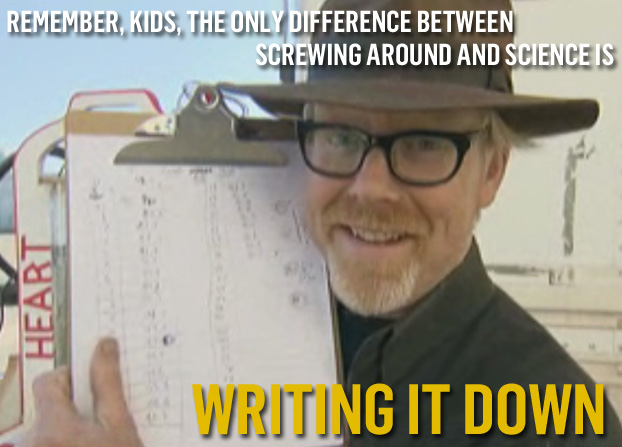


Describe how you got the sequences you're making a tree of, why you got those sequences there, and what question you are trying to answer by making this tree.

Compared to the Basal v2 workflow, this is changing:

We suspect that the variety of M only, and MIKCc and MIKC* sequences is messing up our tree inference. Hence this workflow aims to infer a tree of only MIKCc and MIKC* sequences. That should also be the case for the root of the tree, algal sequences. In a separate notebook I collected algal sequences which at sight seem to have at least the MIK domains.

I'm choosing here to remove short sequences after aligning for the literature review I would need to do up front, or working with lengh only, is not satisfactory.

Extra outgroup sequences:https://www.uniprot.org/uniprot/C4IGU9   https://www.uniprot.org/uniprot/C4IGU6


And the paper where I got these: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC548990/

Just FYI, a screenshot of the domains from the basalv2 workflow:

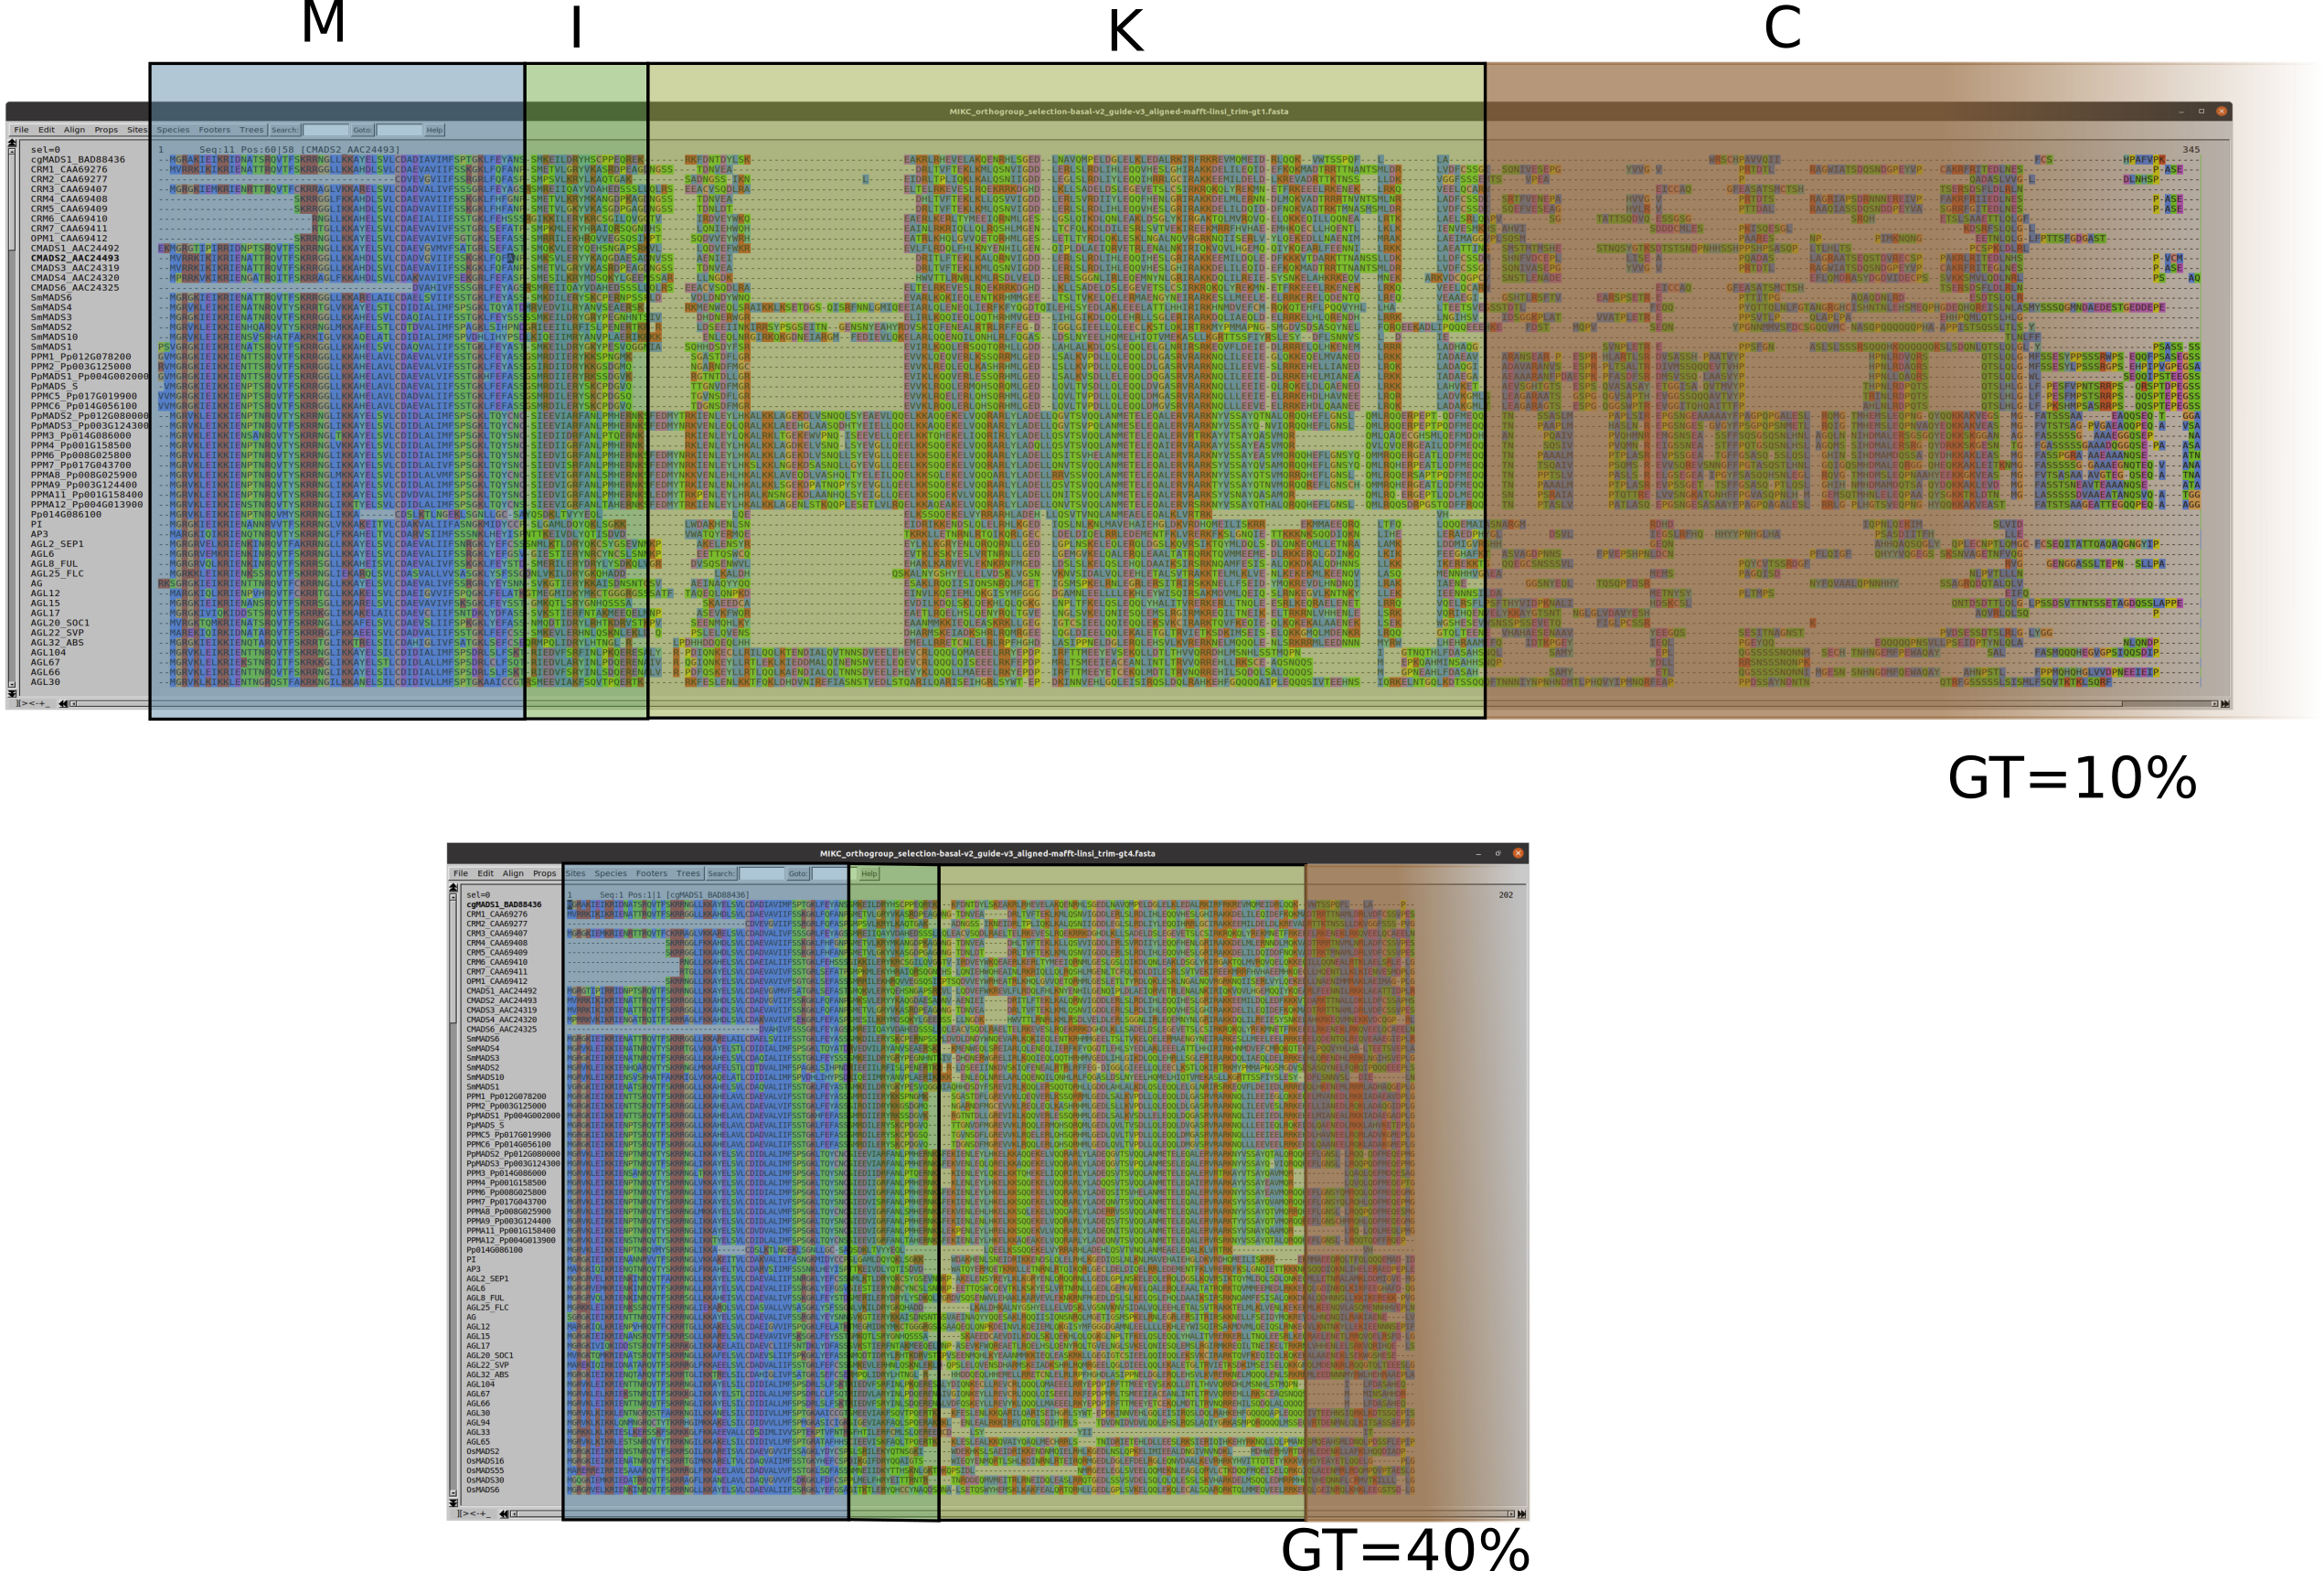

# 1. Composing your fasta

Store the sequences you want to make a tree of in the data directory and make the inseq variable the name of your input fasta without the extention:

In [2]:
inseq=MIKC_orthogroup

Let's look at the first ten lines of your fasta to double-check.

In [3]:
head data/$inseq.fasta

>DUQG-2010341-Tanacetum_parthenium
MGRGKIEIKRIENTSNRQVTYSKRKNGIIKKAKEITVLCDSNVSLVIYGSSGKMYEYCSPKTNLIDMLDRYQRLSGNKLWDAKHENLQNEIDRIKKENESMQIELRHLKGEDITSLNYEELIAYEDALENGLTNIREKKDEIPKIMRKHEQDLE
>NVGZ-2012083-NVGZ-Cephalotaxus_harringtonia-2_samples_combined
QKEKGSQLWDTEHQNLYNEIKRLKEENEKLKSNLRHMKGEDINSLRVEELCLLEQALEIAIDRVRTKKDQIFMQELYSSRKRLSSLEEENKRLRGIAGMRGAIIMDQQQQHGYGHVYAEGEGGTCMHLGPAFRVQPSHPNLKD
>XLGK-2010739-Podocarpus_rubens
MGRGRVELKRIENKINRQVTFSKRRNGLLKKAYELAVLCDAEVAVIIFSSRGKVYEYGSTGSTLKTLERYQKCTYVLQESTVTPDREAQNWNQEVTKLKAKLEFLQQTQRRLLGEELGPLSIKELQQLESQLEIGVKNVRTRREQSTLETIDDLKKRTQQLIETNKALRKQCAMQGQGFASLQAAPHSWDSNAVPNVAYALPPNQSNPVDCEPTLHIGYHYGHPETSMPRQEQTPNGYMQGWML
>Carpa_ASGPBv0_4-evm_model_supercontig_26_316-Carica_papaya
MGRGKIEIKRIENLSNRQVTYSKRRNGIIKKAKEITVLCDARVSLIIFASSGKMHEYCSPSTSLTNMLDEYHKAGKPRLWDAKHENLNNEIERVKKENDNMQIELRHLRGEDITSLNHRDLMALEETLETGLASVRNKQMEVLKMMRRNEKILEEENRRLSFALQQQEIAIENSAREMENGYQQRMREYNAHMPFAFRVQPIQPNLQDRI
>NFXV-2017621-Mumea_americana
MAREKIQIRKIDNATARQVTFSKR

Check the nr. of sequences in your fasta file:

In [4]:
grep '>' data/$inseq.fasta -c

16003


I'm taking the sequences of selection basalv2 and the selection-agal

In [9]:
cat data/MIKC_orthogroup_selection-algae.fasta data/MIKC_orthogroup_selection-basal-v2.fasta > data/MIKC_orthogroup_selection-basal-v3.fasta

## 1.3 add guide sequences
If you have versions of your sequence of special interest, or functionally verified ones, be sure to add them! 

I imagine you have your guide sequences named something like `data/guide_sequences_v1.fasta` Combine the two files like so and update the `$inseq` variable with the new name if you are done in this section.

In [10]:
# for the selection workflow
inseq=MIKC_orthogroup
cat data/outgroup_algae.fasta \
    data/Zhang-2019-fig4_MIKC_Azfi-gymnosperms_selection-v3.faa \
    data/Azfi-v1_MIKC_manual.faa \
    data/azolla_filiculoides/filiculoides_fernbase_blast_results.fasta  \
    data/piceaabies_sequences/picea-abies_MADs_blast_results_uniq.fasta \
    data/salvinia_sequences/salivinia_fernbase_blast_results_uniq.fasta  \
    data/Henriette_guideazfiv2.fasta \
    data/"$inseq"_selection-basal-v3.fasta \
    > data/"$inseq"_selection-basal-v3_guide-v4.fasta

In [12]:
grep '>' data/"$inseq"_selection-basal-v3_guide-v4.fasta -c
grep '>' data/"$inseq"_selection-basal-v3_guide-v4.fasta

425
>tr|Q5KU24|Q5KU24_COLSC MADS-box transcription factor CsMADS1 OS=Coleochaete scutata OX=3125 GN=csmads1 PE=2 SV=1
>tr|Q5KTX4|Q5KTX4_9VIRI MADS-box protein CpMADS1 (Fragment) OS=Closterium peracerosum-strigosum-littorale complex OX=34146 GN=CpMADS1 PE=2 SV=1
>cgMADS1_BAD88436
>CRM1_CAA69276
>CRM2_CAA69277
>CRM3_CAA69407
>CRM4_CAA69408
>CRM5_CAA69409
>CRM6_CAA69410
>CRM7_CAA69411
>OPM1_CAA69412
>CMADS1_AAC24492
>CMADS2_AAC24493
>CMADS3_AAC24319
>CMADS4_AAC24320
>CMADS6_AAC24325
>SmMADS6
>SmMADS4
>SmMADS3
>SmMADS2
>SmMADS10
>SmMADS1
>PPM1_Pp012G078200
>PPM2_Pp003G125000
>PpMADS1_Pp004G002000
>PpMADS_S
>PPMC5_Pp017G019900
>PPMC6_Pp014G056100
>PpMADS2_Pp012G080000
>PpMADS3_Pp003G124300
>PPM3_Pp014G086000
>PPM4_Pp001G158500
>PPM6_Pp008G025800
>PPM7_Pp017G043700
>PPMA8_Pp008G025900
>PPMA9_Pp003G124400
>PPMA11_Pp001G158400
>PPMA12_Pp004G013900
>Pp014G086100
>PI
>AP3
>AGL2_SEP1
>AGL6
>AGL8_FUL
>AGL25_FLC
>AG
>AGL12
>AGL15
>AGL17
>AGL20_SOC1
>AGL22_SVP
>AGL32_ABS
>AGL104
>AGL67
>AGL66
>AGL30

>IRZA-2060948-Proteomonas_sulcata
>MXDS-2024758-Spermatozopsis_exsultans
>VBLH-2005464-Cladophora_glomerata
>AZZW-2004234-Chlorokybus_atmophyticus
>DRGY-2036441-Chaetosphaeridium_globosum
>IJMT-2090153-Aphanochaete_repens
>MNNM-2042156-Cosmarium_granatum
>YDCQ-2002995-Cephaleuros_virescens
>OBUY-2002084-Porphyridium_cruentum
>AKCR-2016810-Parachlorella_kessleri
>IHJY-2008922-Kappaphycus_alvarezii
>QFND-2006855-Cyanophora_paradoxa-CCAC_0074
>LBRP-2057637-Chloromonas_reticulata-A
>JEBK-2024384-Eucheuma_denticulatum
>PUAN-2001825-Pedinomonas_tuberculata
>BAJW-2043867-Isochrysis_sp.
>WDGV-2005229-Cosmarium_subtumidum
>JTIG-2001880-Bryopsis_plumosa
>MMKU-2003215-Nephroselmis_olivace
>BAJW-2009533-Isochrysis_sp.
>BCYF-2040514-Chlamydomonas_cribrum
>IJMT-2016960-Aphanochaete_repens
>AJAU-2006740-Helicodictyon_planctonicum
>VFIV-2046147-Fritschiella_tuberosa
>RSOF-2042181-Glaucosphaera_vacuolata
>IHJY-2008923-Kappaphycus_alvarezii
>ACRY-2040985-Pteromonas_sp.
>UTRE-2013475-Chloromonas_tughille

>PQED-2054148-Gloeochaete_wittrockiana
>PIVW-2004036-Ceratopteris_thalictroides
>JVSZ-2122133-Equisetum_hymale
>ENQF-2007944-Lycopodium_annotinum
>RDOO-2000122-Racomitrium_varium
>BGXB-2008746-Plagiomnium_insigne
>DXOU-2000995-Nothoceros_aenigmaticus
>PIVW-2020998-Ceratopteris_thalictroides
>UYFR-2005123-Symphyocladia_latiuscula
>UPMJ-2005050-Pseudolycopodiella_caroliniana
>FFPD-2013098-Ceratodon_purpureus
>PIVW-2004304-Ceratopteris_thalictroides
>DXOU-2004607-Nothoceros_aenigmaticus
>PIVW-2000174-Ceratopteris_thalictroides
>ENQF-2004632-Lycopodium_annotinum
>JVSZ-2127811-Equisetum_hymale
>UYFR-2005122-Symphyocladia_latiuscula
>UPMJ-2018444-Pseudolycopodiella_caroliniana
>JVSZ-2014698-Equisetum_hymale
>JVSZ-2127731-Equisetum_hymale
>PIVW-2000450-Ceratopteris_thalictroides
>JVSZ-2000819-Equisetum_hymale
>QMWB-2056566-Anomodon_attenuatus
>AKXB-2062983-Phaeomegaceros_coriaceus
>RDOO-2000811-Racomitrium_varium
>CBAE-2013716-Huperzia_myrisinites
>UPMJ-2005049-Pseudolycopodiella_caroliniana


In [13]:
# for the selection workflow
inseq="$inseq"_selection-basal-v3_guide-v4
echo $inseq

MIKC_orthogroup_selection-basal-v3_guide-v4


In [14]:
head data/$inseq.fasta

>tr|Q5KU24|Q5KU24_COLSC MADS-box transcription factor CsMADS1 OS=Coleochaete scutata OX=3125 GN=csmads1 PE=2 SV=1
MGRGKIEIRRIENATSRQVTFSKRRNGLLKKAYELSVLCDVDIAVIVFSPTGKLFQYASS
SMKEILERYEQVPPEQKEKGSQRLDNMDYLNREVAKLRNEVEHKYHEARQLEGEDLDRLG
VYELEQLEQKLSNSMRRIRGRKDELMKAELEGLRKQVADMETALVGAASFDGRPLSGSSN
YLLQSIPGIRTMPPSSLGGMNPASTSLQLGSDRLFGNRGVELHDRSASDESPVMTNRMSV
DFAQAPREMSGVDLSGSPVPPWKSQAAAAAQQEWKNQASSPTDWKVTNTEHLDSWPKAPA
PTPEWKSTSVQPEWKNQSSPSSEWKPLDWMYHGPQD
>tr|Q5KTX4|Q5KTX4_9VIRI MADS-box protein CpMADS1 (Fragment) OS=Closterium peracerosum-strigosum-littorale complex OX=34146 GN=CpMADS1 PE=2 SV=1
MGRGKIEIRKIDNATTRQVTFSKRRNGLLKKAYELAVLCDVEIGVIIFSATGKLFQYAST
NMDSIVERYRRLALETGKDPRPPWQQQNPPQSTGLGAQHGQHNKHGKEKPGQLQARTQQQ


In [15]:
grep '>' -c data/$inseq.fasta

425


# 2. Aligning

Now we have our fasta file with a feasible amount of sequences. Next step is aligning these. While this may seem trivial, the method of aligning can actually influence your end results quite a bit. Roughly speaking there is several alignment algorithms:

1. progressive
   - mafft
   - clustal?
2. pair-wise
   - mafft
   - ...
3. ...

Especially for bigger datasets, I prefer mafft for it is simply very fast and gave me good results in the past. But by all means try more ways if you get odd results.

If you have a good idea of what you're doing, and you want to run multiple alignments in a loop and go have lunch, have a look at section 2.2.

## 2.1 running alignments (one by one).

### 2.1.1. MAFFT [online](https://mafft.cbrc.jp/alignment/server/)

If you find mafft options and parameters confusing, and/or you have difficulty making alignments, 
then you may tre to use the online service [here](https://mafft.cbrc.jp/alignment/server/). 
The online MAFFT service does a good job at explaining the parameters and has a nice visualisation as well!
So read the webpage, and choose your options and parameters aided by the explanations in the webpage. When you submit your job, the mafft command issued in the background is actually shown to you! Hence you can copy paste that command here if you'd like. That's especially useful when the server is under high load, in this notebook you may choose to use all threads available on your computer `--threads $(nproc)`.

Using the MSAviewer that you can open after running your alignment on this server, you can even interactivelly trim. From a reproducibility/scaling point of view, this is not ideal, but to get a feeling for what you are doing, it is very usefull. Just make sure you keep a record of what you do, and keep intermediate results with clear names.

### 2.1.2 MAFFT local
I'll start with showing you my go-to approach. First, have a look at the manual. 

Next I'll make a directory to store the untrimmed (hence raw) alignments and run the alignment on all available CPU cores.

I like to do this in 'if loops' to prevent re-doing things unnecessarily.

In [16]:
# If jupyter cannot find mafft, but it is installed via conda, try this pragmatic fix:
conda activate phylogenetics

(phylogenetics) 

: 1

### e-insi

choosing einsi method now, for it is used with multiple conserved domains where linsi focusses on a single conserved domain.

In [17]:
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
if    [ ! -f "./data/alignments_raw/$inseq"_aligned-mafft-linsi.fasta ]
then  einsi --thread $(nproc) data/$inseq.fasta > ./data/alignments_raw/"$inseq"_aligned-mafft-einsi.fasta
fi

(phylogenetics) outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.458
alg=N, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
8 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  420 / 425
done.

Progressive alignment ... 
STEP   349 /424 (thread    1) 
Reallocating (by thread 6) ..done. *alloclen = 3153
STEP   424 /424 (thread    6) 
done.
tbfast (aa) Version 7.458
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
8 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 8
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  420 / 425
Segment   1/  1    1-2650
008-0846-0 (thread    5) worse         
Converged2.
done
dvtditr (aa) Version 7.458
alg=A, m

: 1

In [18]:
ls ./data/alignments_raw

MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-ginsi.fasta
MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi-dash.fasta
MIKC_orthogroup_selection-algae_guidev3_aligned-mafft-linsi.fasta
MIKC_orthogroup_selection-basal-v1_guide-v2_aligned-mafft-linsi.fasta
MIKC_orthogroup_selection-basal-v2_guide-v3_aligned-mafft-auto.fasta
MIKC_orthogroup_selection-basal-v2_guide-v3_aligned-mafft-linsi.fasta
MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi.fasta
MIKC_orthogroup_selection-v1_guide-v1_aligned-mafft-linsi.fasta
MIKC_orthogroup_selection-v2_guide-v2_aligned-mafft-linsi.fasta
(phylogenetics) 

: 1

In [20]:
head ./data/alignments_raw/"$inseq"_aligned-mafft-einsi.fasta

>tr|Q5KU24|Q5KU24_COLSC MADS-box transcription factor CsMADS1 OS=Coleochaete scutata OX=3125 GN=csmads1 PE=2 SV=1
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
-------------------M----------------------------------------
(phylogenetics) 

: 1

# 3. Alignment trimming

First I remove collumns with hardly any info.

In [21]:
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi

# define appendix only once here:
trimappendix='trim-gt1'


for a in "data/alignments_raw/$inseq"_aligned*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .1 \
                 -htmlout data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".html
    fi
done

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) trimming alignment data/alignments_raw/MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi.fasta
(phylogenetics) 

: 1

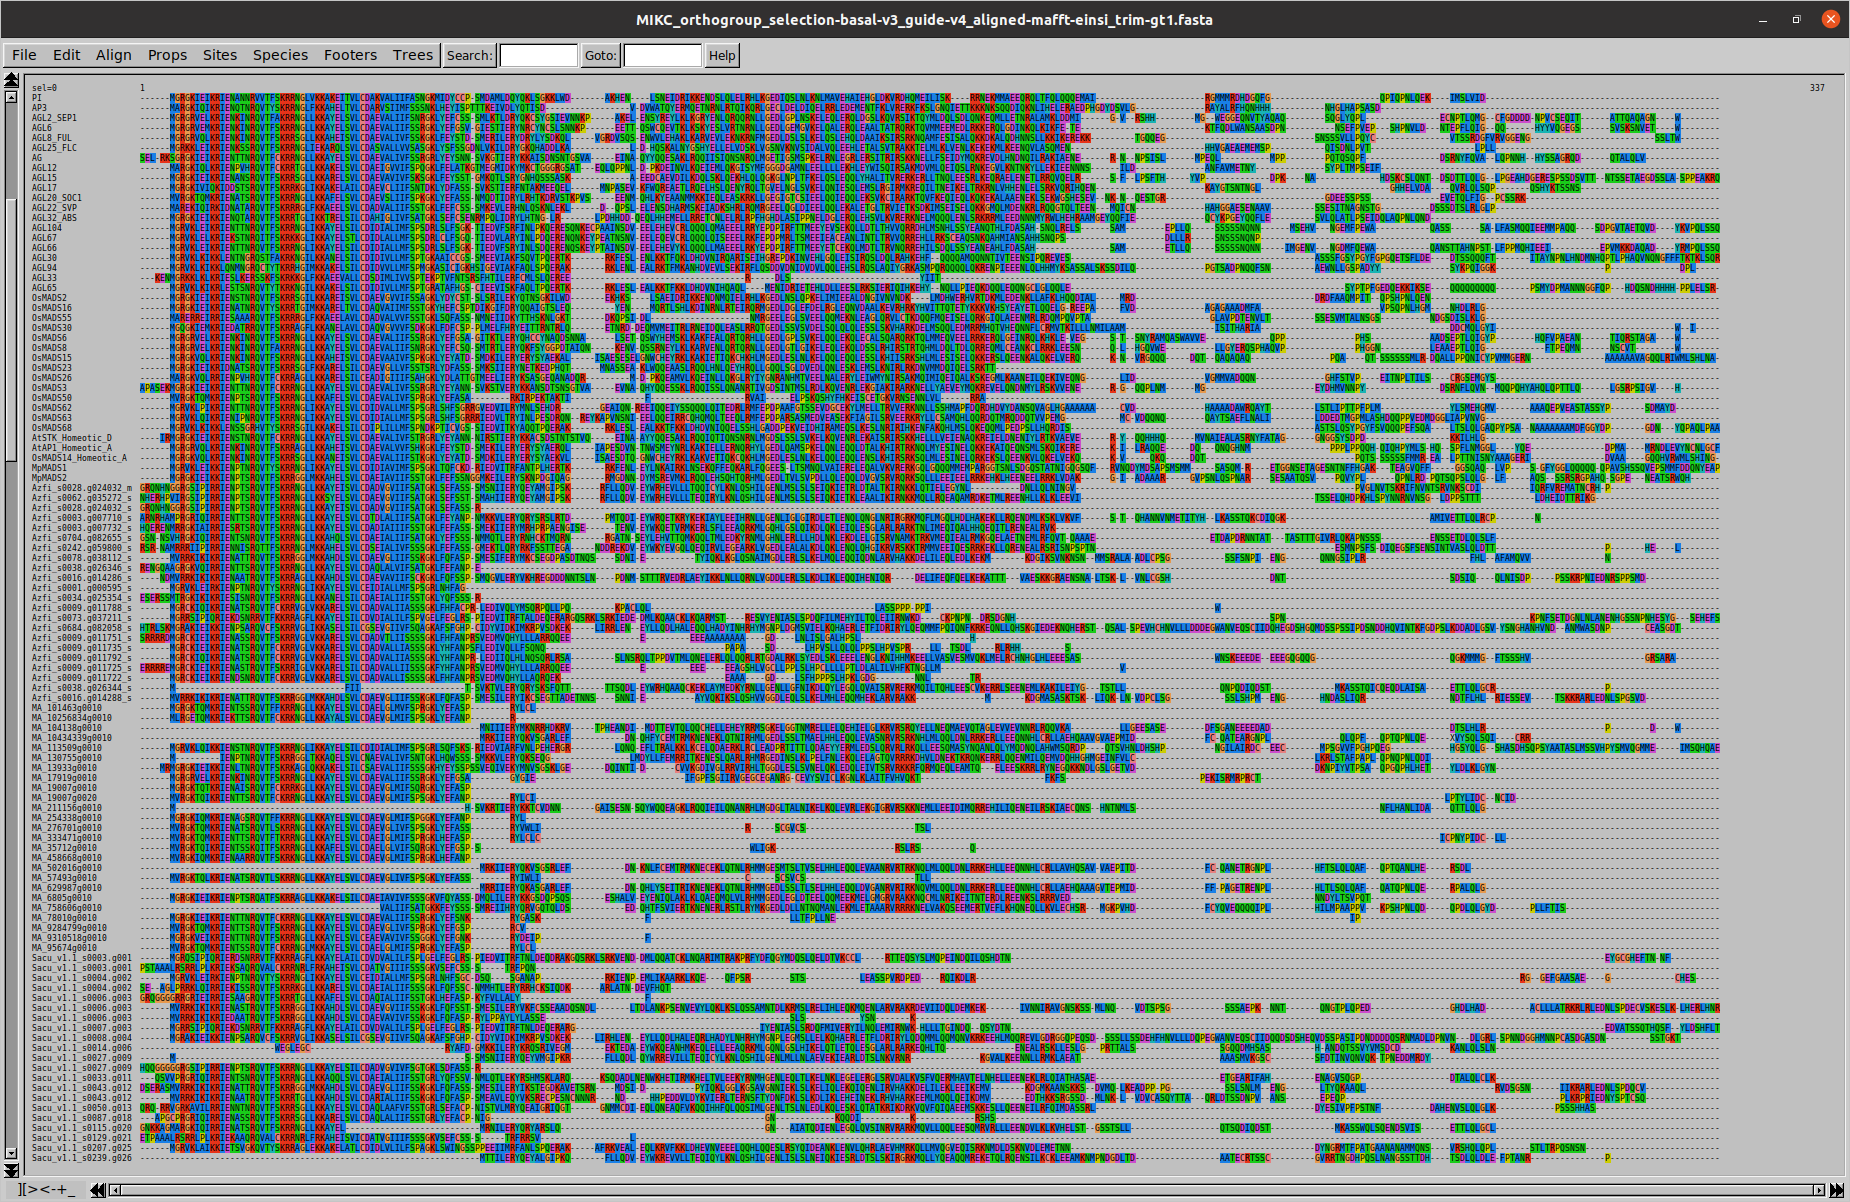

That already gives me the M, I and K domains. Now I'll just manually remove everything that doesn't have a K domain or looks suspicious too me.

In [23]:
ls data/alignments_trimmed/$inseq*.fasta

data/alignments_trimmed/MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi_trim-gt1.fasta
data/alignments_trimmed/MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta
(phylogenetics) 

: 1

Now This is how it looks trimmed: 

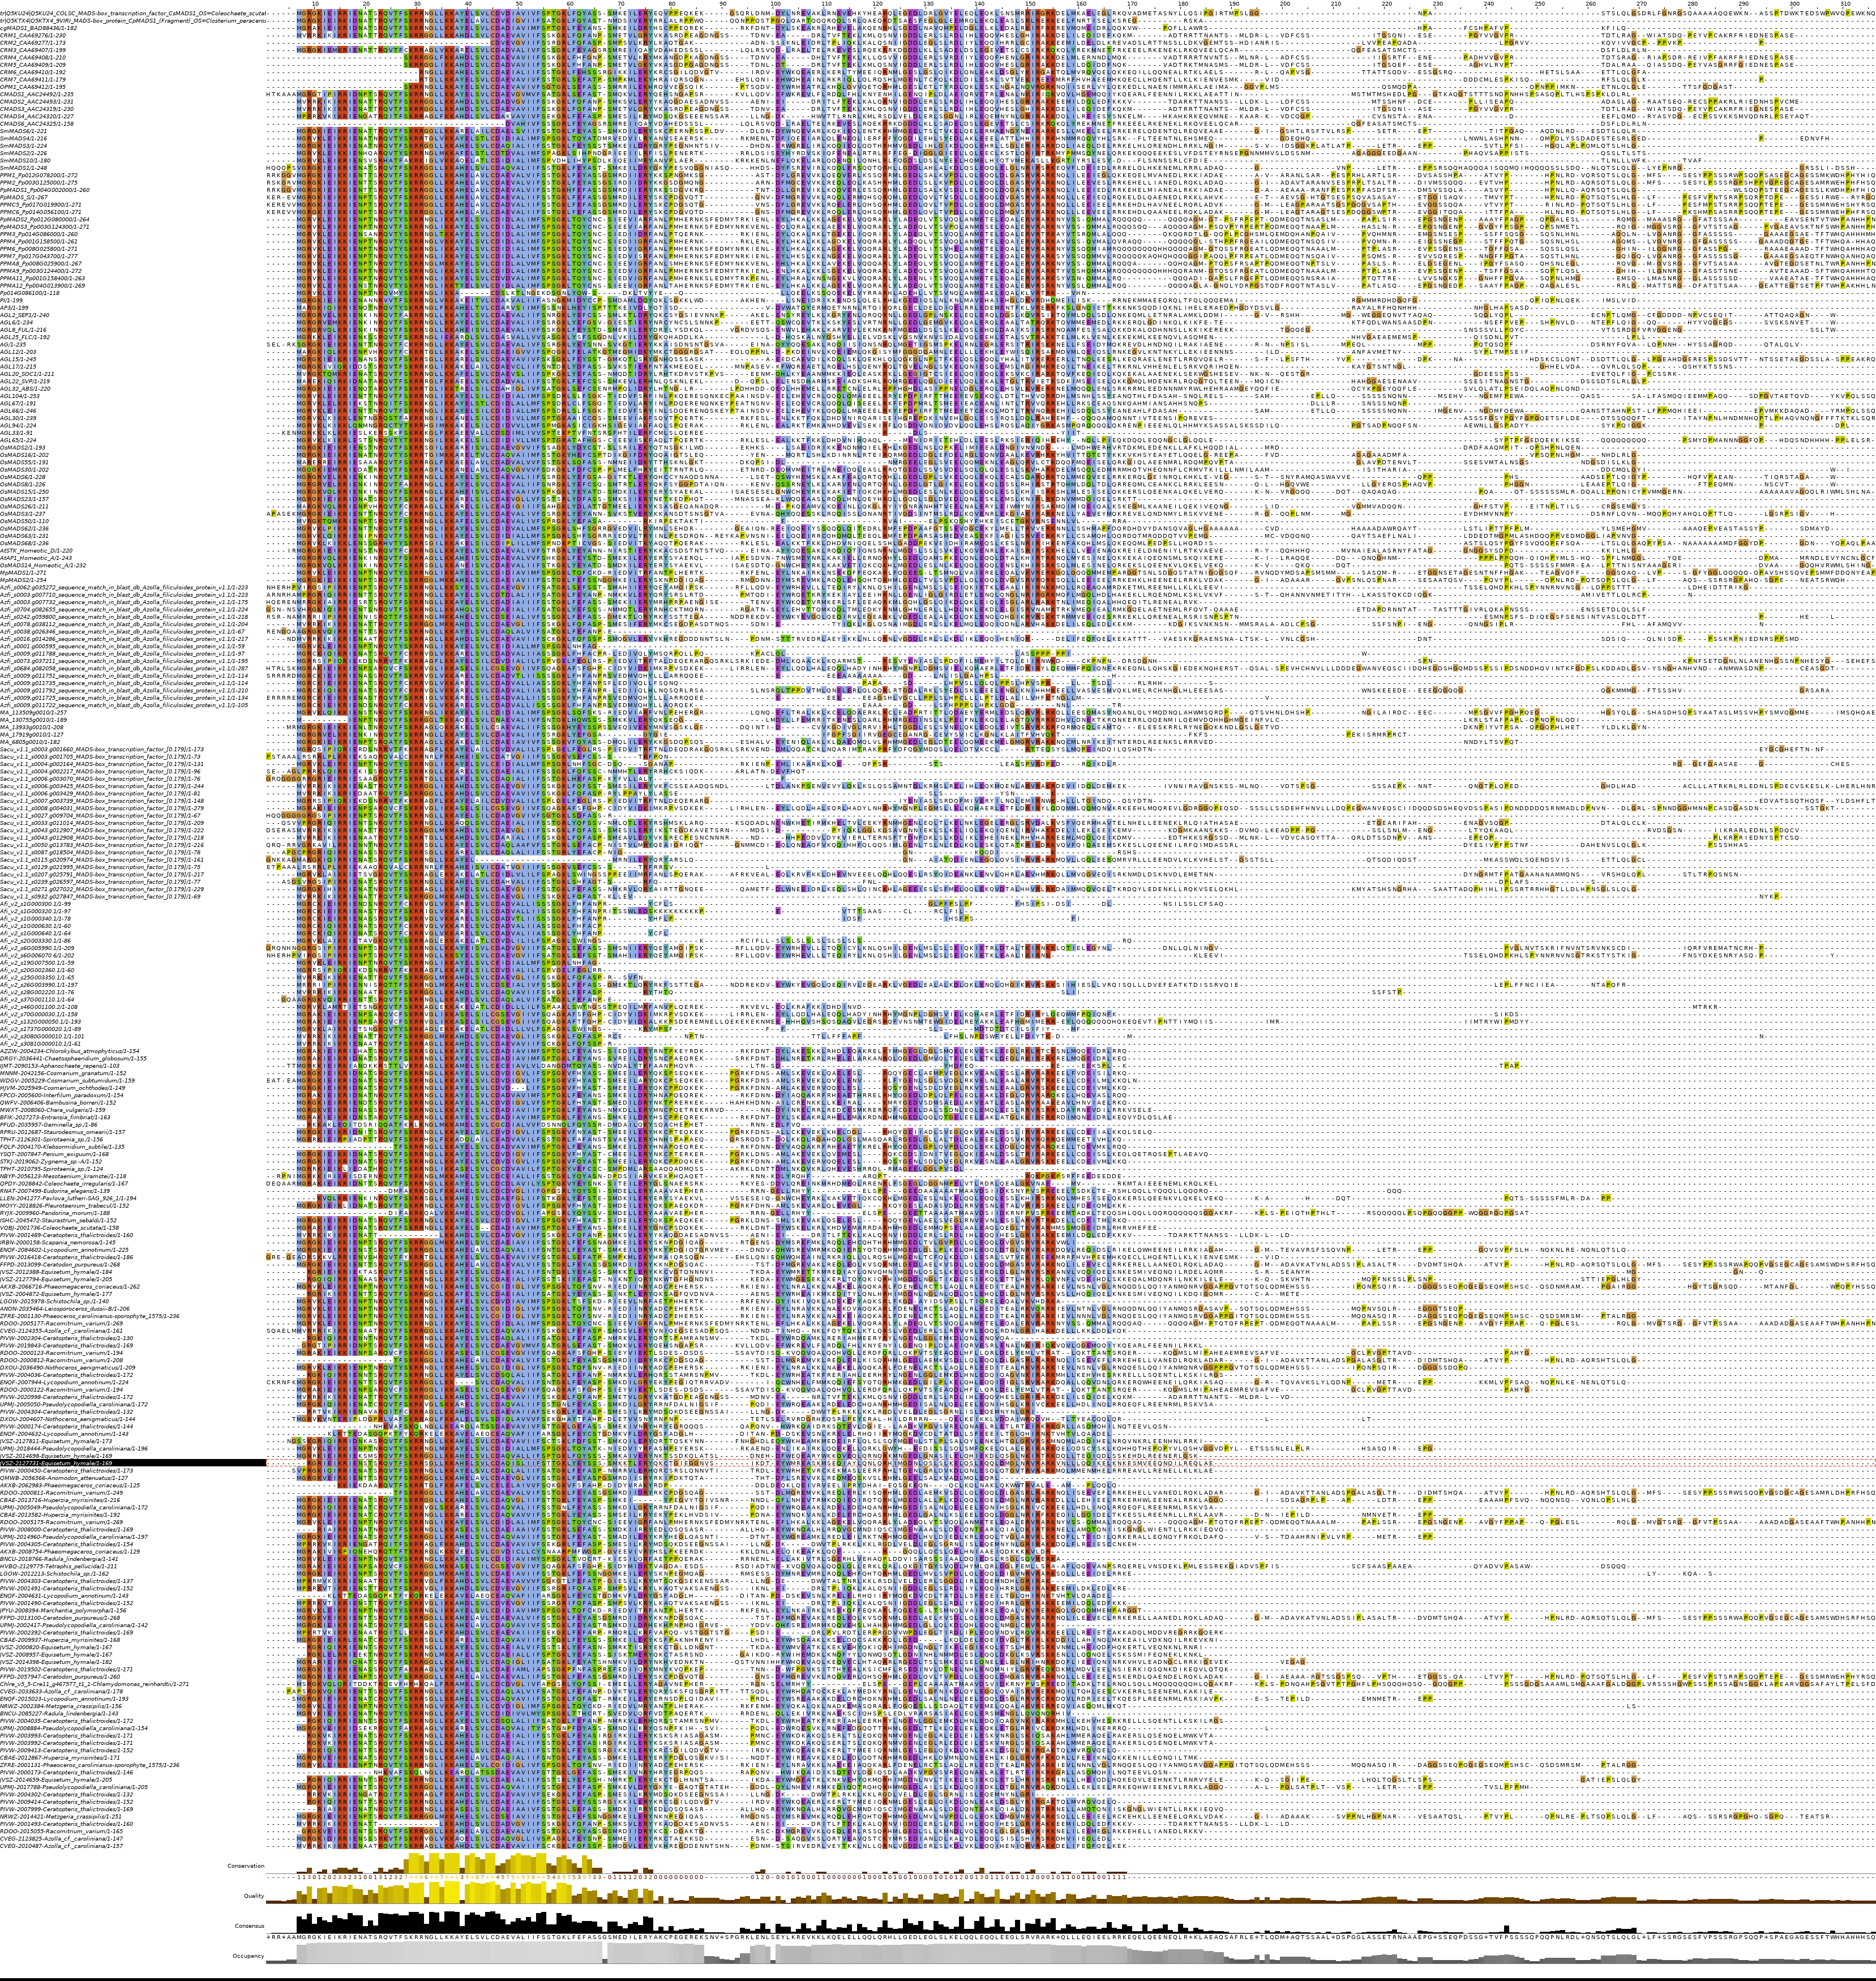

Removed 47 sequences by hand (in seqview) for they lacked major parts of the MADS DNA binding domain.

# 4. Fast tree building
Here we'll make fast trees: not acurate, no bootstraps, but fast. This gives us an idea of the output and how we will process it. Building 'propper' trees can take days sometimes weeks, so it's better to be sure you have all sequences in there you want before you start. 

I use two ways to make thise fast trees, first with a program called `fasttree` and second with the programm `iqtree` with the `-fast` parameter. My gut feeling is that the latter is a bit more acurate but takes a couple of minutes. Fasttree takes seconds.

I arbitrarily consider trees to be analyses and not data, hence I store these in the `analyses` directory.

Since these trees run fast (just take a second to consider how rediculous that sounds) I propose to run these in loops again, taking all the trimmed alignments that were made earlier. The trees run in parallel on one CPU. If you're running many trees (way more than you have computing cores) then don't run these in the background. Practically, that means removing the `&` character almost at the end of the loop.

## 4.1 fasttree

In [ ]:
for a in data/alignments_trimmed/"$inseq"_aligned*.fasta
do  echo "making a fasttree of file $a"
    appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    echo $appendix
    
    if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
    then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
    fi
    
    prefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_fasttree
    if   [ ! -f "$prefix".tree ]
    then nice fasttree -log "$prefix".log \
                       $a \
                       >  "$prefix".tree \
                       2> "$prefix".stderr &
    fi
done
wait

In [ ]:
tail analyses/"$inseq"_fasttrees/*/*fasttree.stderr

In [ ]:
tree analyses/"$inseq"_fasttrees/

## 4.2 IQtree -fast

And here is the same but for running iqtree. I picked some random model here, but substitute it by anything you like better or have good experience with it the past.

In [ ]:
for a in data/alignments_trimmed/"$inseq"_aligned*.fasta
do  echo "making a iqtree fast tree of file $a"
    appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    echo $appendix
    if   [ ! -d   analyses/"$inseq"_fasttrees/"$appendix" ]
    then mkdir -p analyses/"$inseq"_fasttrees/"$appendix"
    fi
    
    iqprefix=analyses/"$inseq"_fasttrees/"$appendix"/"$inseq"_"$appendix"_iqtree-fast
    if   [ ! -f "$iqprefix".iqtree ]
    then nice iqtree -s $a -fast \
                     -m 'LG+R7' \
                     -pre "$iqprefix" \
                     > "$iqprefix".stdout \
                     2> "$iqprefix".stderr &
    fi
done
wait

## 4.3 Visualise your fast trees. 

To visualise your trees, you perhaps already have something installed like mega, seaview, etc. Otherwise you can upload the tree file to [iToL](https://itol.embl.de/) (my prefered method) or any other website that visualises trees. See section 6 for uploading your trees to iToL.

Alternativelly, we can try to get a quick snapshot here in the notebook:

### 4.3.1 Tree comparisons 

You may want to run a quick comparison table like so:

In [ ]:
ete3 compare --unrooted -t ./analyses/MYBs-nina_fasttrees/*/*fasttree.tree -r ./analyses/MYBs-nina_fasttrees/*/*iqtree-fast.treefile

Collumns abbreviations:

* source target tree used
* ref reference tree used to compare with
* eff.size Effective tree size used for comparisons (after pruning not shared items)
* nRF Normalized Robinson-Foulds distance (RF/maxRF)
* RF Robinson-Foulds symmetric distance
* maxRF maximum Robinson-Foulds value for this comparison
* %src_br frequency of edges in target tree found in the reference (1.00 = 100% of branches are found)
* %ref_br frequency of edges in the reference tree found in target (1.00 = 100% of branches are found)
* subtrees Number of subtrees used for the comparison (applies only when duplicated items are use to decomposed target trees)
* treekoD Average distance among all possible subtrees in the original target trees to the reference tree (TreeKO speciation distance).

Big numbers or fractions are usually not a good sign, but can happen. Just be extra carefull before drawing any conclusions.

## 5. Building trees with IQtree 

Finally, we're at the stage to build propper maximum likelyhood phylogenetic trees! Based on your previous results, you should have one or two trimmed alignments you want to make a tree of. There is several choices to make still: a model of evolution and a bootstrapping method.

**modelfinder**

IQtree is a state-of-the art tree buildling program, which has a model finder algorithm included! This can take a couple of hours, so be sure to do this only once. There is two model finder options, a quick one with some often used models: `-m TEST` or an extended modelfinder, using more models of evolution and substitution: `-m MFP`. I recommend the latter. Once you have your best-fit model (for example: 'LG+R7') then use this model when you build more trees from the same alignment: `-m 'LG+R7'`

**bootstrapping**

Normal or 'non-parametric' bootstrapping can take quite a long time; I have had trees running for weeks. Hence there is alternatives that are a lot faster but might over or underestimate the bootstrap values if your alignment doesn't fit your model well. To use 'normal bootstraps' the minimum is 100. That's why I like to to 200 to be safe, by adding the option `-b 200`.

Alternativelly, there is the 'ultrafast bootstrap' option in IQtree. The minumum for this is 1000 bootstraps, so I'd like to do double by including the parameter: `-bb 2000`. Additionally, I highly recommend also running the approximate likelyhood ratio test for 2000 bootstraps at the same time by including parameters `-alrt 2000`. This adds a minimal amount of run time and makes interpretation of your tree a lot more reliable.

As the [IQtree FAQ](http://www.iqtree.org/doc/Frequently-Asked-Questions#how-do-i-interpret-ultrafast-bootstrap-ufboot-support-values) says: typically you start believing a clade when the ultra fast bootstraps => 95 and alrt => 80. Interpretation of these values is not linear like 'normal' bootstrap, hence if you lower the threshold of ultrafast bootstraps to 90, you will likely enormously overestimate your results. 

**other command-line options**

In the commandline I wrote below, I instruct iqtree to use no more CPU cores than your computer has, but also to find the optimum amount of cores (more is not always better). Second, a prefix is defined to store the different trees that IQtree wil make.

**More info**
* iqtree tutorial: http://www.iqtree.org/doc/Tutorial
* aLRT: https://www.ncbi.nlm.nih.gov/pubmed/16785212





## running IQtree

Now these are all trimmed alignments you have available. 
Choose one to start with (based on your fasttrees or inspections of your alignments).

Make sure that 
1. the path to this alignment is the variable `$a` 
2. you choose an appendix based on your iqtree settings

In [3]:
inseq=MIKC_orthogroup_selection-basal-v3_guide-v4
ls data/alignments_trimmed/"$inseq"_aligned*fasta

data/alignments_trimmed/MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi_trim-gt1.fasta
data/alignments_trimmed/MIKC_orthogroup_selection-basal-v3_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta


In [5]:
conda activate phylogenetics

(phylogenetics) 

: 1

In [7]:
a=data/alignments_trimmed/MIKC_orthogroup_selection-basal-v2_guide-v3_aligned-mafft-linsi_trim-gt4.fasta

#iqpendix='iqtree-b200'
iqpendix='iqtree-MFP-bb2000-alrt2000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_iqtree-bb1000.tree ]
then nice iqtree -s $a \
                 -m 'MFP' \
                 -bb 2000 \
                 -alrt 2000 \
                 -nt AUTO \
                 -ntmax $(nproc)  \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout && cat "$iqprefix".log | mail -s IQtree_run laura &
fi

Terminated
Terminated
[1]-  Exit 143                nice iqtree -s $a -m 'MFP' -bb 2000 -alrt 2000 -nt AUTO -ntmax $(nproc) -pre "$iqprefix" 2> "$iqprefix".stderr > "$iqprefix".stdout && cat "$iqprefix".log | mail -s IQtree_run laura
[2]+  Exit 143                nice iqtree -s $a -m 'MFP' -bb 2000 -alrt 2000 -nt AUTO -ntmax $(nproc) -pre "$iqprefix" 2> "$iqprefix".stderr > "$iqprefix".stdout && cat "$iqprefix".log | mail -s IQtree_run laura
(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) making a tree of file data/alignments_trimmed/MIKC_orthogroup_selection-basal-v2_guide-v3_aligned-mafft-linsi_trim-gt4.fasta
(phylogenetics) The first lines of alignment data/alignments_trimmed/MIKC_orthogroup_selection-basal-v2_guide-v3_aligned-mafft-linsi_trim-gt4.fasta look like this
(phylogenetics) >cgMADS1_BAD88436
MGRAKIEIKRIDNATSRQVTFSKRRNGLLKKAYELSVLCDADIAVIMFSPTGKLFEYANS
SMKEILDRYHSCPPEQREK---KFDNTDYLSKEAKRLRHEVELAKQENRHLSGEDLNAVQ
MPELDGLELKLEDALRKIRFRKREVMQMEI

: 1

You can have a look at the last lines of your log file like this:

In [14]:
tail -n 30 $iqprefix.log

BEST NUMBER OF THREADS: 4

  1  Dayhoff       46110.397    591 93402.793    793146.793   95293.105
  2  Dayhoff+G4    43791.645    592 88767.289    790879.289   90660.800
  3  Dayhoff+R2    44233.240    593 89652.479    794136.479   91549.188
  4  Dayhoff+R3    43901.844    595 88993.688    798233.688   90896.793
  5  Dayhoff+R4    43749.981    597 88693.963    802705.963   90603.466
  6  Dayhoff+R5    43699.130    599 88596.260    807396.260   90512.160
  7  Dayhoff+R6    43672.500    601 88547.000    812151.000   90469.297
  8  Dayhoff+R7    43665.695    603 88537.391    816961.391   90466.084
  9  Dayhoff+R8    43656.369    605 88522.739    821782.739   90457.830
 10  Dayhoff+R9    43653.691    607 88521.381    826633.381   90462.869
 12  Dayhoff+F     46088.495    610 93396.989    838816.989   95348.072
 13  Dayhoff+F+G4  43704.065    611 88630.130    836494.130   90584.412
 14  Dayhoff+F+R2  44181.291    612 89586.582    839898.582   91544.063
 15  Dayhoff+F+R3  43824.745    614 8

: 1

In [70]:
grep 'START BOOTSTRAP'  $iqprefix.log -c 
grep 'START BOOTSTRAP'  $iqprefix.log

15
(phylogenetics) ===> START BOOTSTRAP REPLICATE NUMBER 1
===> START BOOTSTRAP REPLICATE NUMBER 2
===> START BOOTSTRAP REPLICATE NUMBER 3
===> START BOOTSTRAP REPLICATE NUMBER 4
===> START BOOTSTRAP REPLICATE NUMBER 5
===> START BOOTSTRAP REPLICATE NUMBER 6
===> START BOOTSTRAP REPLICATE NUMBER 7
===> START BOOTSTRAP REPLICATE NUMBER 8
===> START BOOTSTRAP REPLICATE NUMBER 9
===> START BOOTSTRAP REPLICATE NUMBER 10
===> START BOOTSTRAP REPLICATE NUMBER 11
===> START BOOTSTRAP REPLICATE NUMBER 12
===> START BOOTSTRAP REPLICATE NUMBER 13
===> START BOOTSTRAP REPLICATE NUMBER 14
===> START BOOTSTRAP REPLICATE NUMBER 15
(phylogenetics) 

: 1

In [78]:
grep 'Total CPU time used'  $iqprefix.log -c 
grep 'Total CPU time used'  $iqprefix.log

14
(phylogenetics) Total CPU time used: 13791.055 sec (3h:49m:51s)
Total CPU time used: 3679.373 sec (1h:1m:19s)
Total CPU time used: 6833.649 sec (1h:53m:53s)
Total CPU time used: 4335.747 sec (1h:12m:15s)
Total CPU time used: 8584.484 sec (2h:23m:4s)
Total CPU time used: 6662.962 sec (1h:51m:2s)
Total CPU time used: 6010.418 sec (1h:40m:10s)
Total CPU time used: 8221.260 sec (2h:17m:1s)
Total CPU time used: 6261.218 sec (1h:44m:21s)
Total CPU time used: 5998.986 sec (1h:39m:58s)
Total CPU time used: 8667.524 sec (2h:24m:27s)
Total CPU time used: 9995.875 sec (2h:46m:35s)
Total CPU time used: 4633.229 sec (1h:17m:13s)
Total CPU time used: 9898.357 sec (2h:44m:58s)
(phylogenetics) 

: 1

Are you content with your tree? Great news! If you want to do another run, I recommend copying the cell above and editing the copy. That way you keep the code for all trees you made. Don't forget to explain what you observed, why you're making a new tree, and what you're changing (remember this is your labjournal). 

# tree storage

For tree storage and sharing, I have yet to encounter a better tool than EMBLs [iToL](https://itol.embl.de/). It's a great interface for exploring and sharing trees with colleagues. You can browse to the treefile IQtree created on your computer and upload it to iToL. Alternativelly, you can copy paste the contents of the file to iToL. Make sure to keep the original filename as well! This file name now contains a brief summary of how this tree was made.

conclusions
===========

Trees are looking better, moddelfitting was a clear improvement, Henriette suspects that not trimming or very loosly trimming is better than trimming the alignments, hence we try gt=.1 and untrimmed. Also we're trying mafft auto because that what she used before. 